# Wine clustering using KNN
This example uses KNN in order to clustering the Wine data set and then predict the origin of the wine based on 13 constituents found in each of the three types of wines. 

This is a copy of UCI ML Wine recognition datasets. https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

## Load the Dataset

In [1]:
import numpy as np  
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

data = datasets.load_wine()

/Users/jpm/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [3]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [4]:
np.unique(data.target)

array([0, 1, 2])

In [5]:
wine = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [6]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [7]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## Display some features relationship graphs

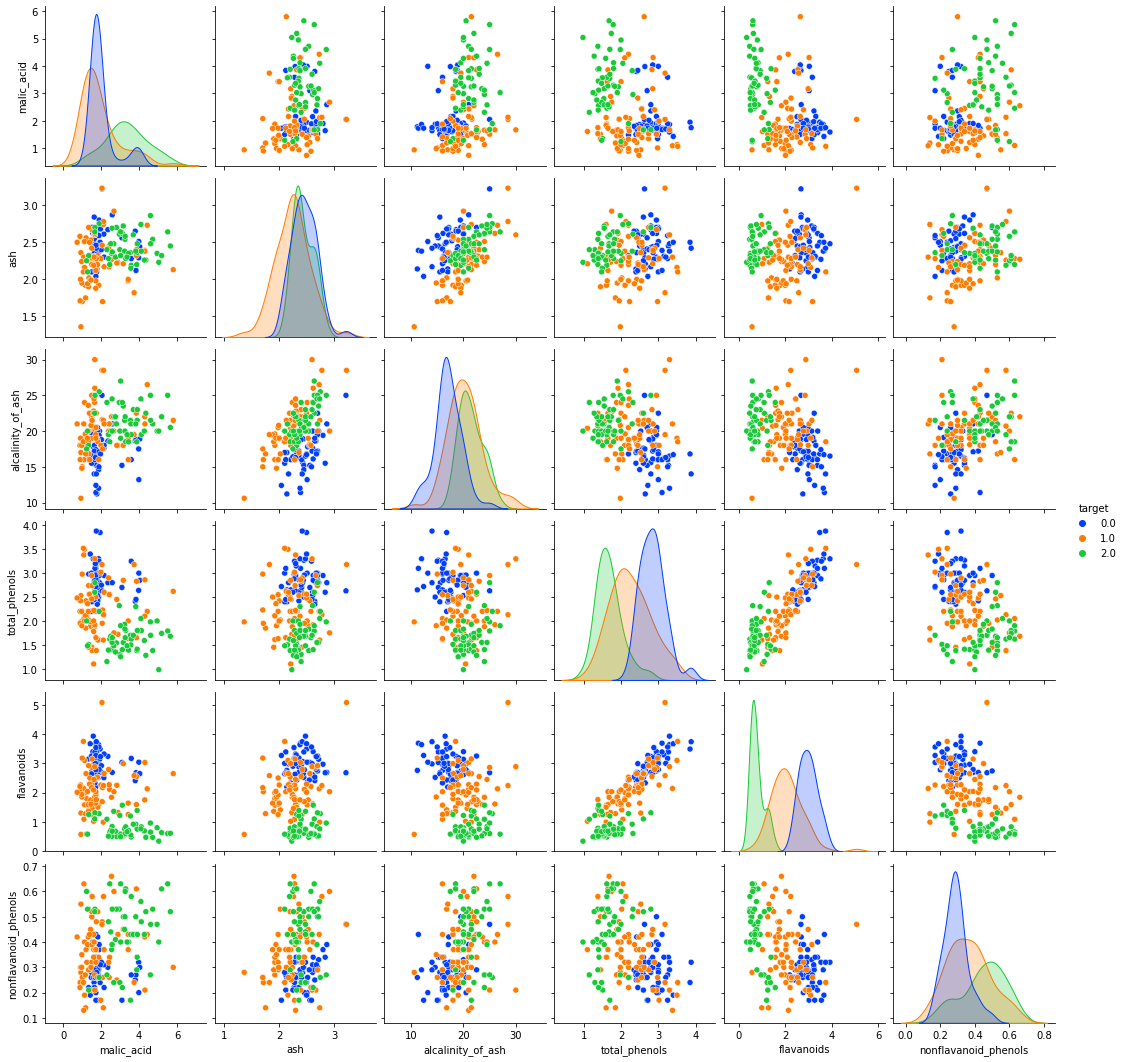

In [8]:
import seaborn as sns
sns.pairplot(wine, vars=["malic_acid", "ash", "alcalinity_of_ash", "total_phenols", "flavanoids", "nonflavanoid_phenols"], hue='target', palette='bright')

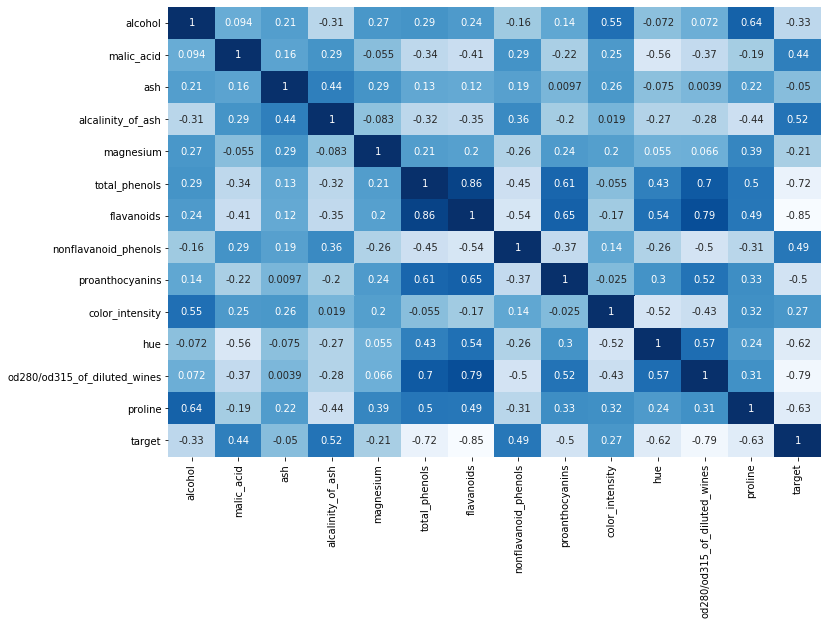

In [9]:
from matplotlib import pyplot

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(wine.corr(), ax=ax, cbar=False, annot=True, cmap="Blues")

In [10]:
X = wine.drop('target', axis=1)
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


## Split the Dataset
Split the dataset into 80% trainning and 20% test examples

In [19]:
from sklearn.model_selection import train_test_split
X = wine.drop('target', axis=1)
y = wine['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Pre-process the dataset
In order to have a normalized base

In [20]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled[0]

array([-0.50553104,  2.77685614,  1.08295964,  1.61890623, -0.15898494,
       -0.79780999, -1.43744917,  2.12192589, -0.89191253, -0.01588344,
       -0.62108532, -1.38212983, -0.72628112])

## Create the KNN Classifier
And predict the class of test base

In [36]:
from sklearn.neighbors import KNeighborsClassifier  

knn = KNeighborsClassifier(weights='distance', n_neighbors=2)  
knn.fit(X_train_scaled, y_train) 
y_pred = knn.predict(X_test_scaled)

## Evaluate the results
Plot the confusion matrix and the classification report (precision, recall, f1-score and the support)

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        19
         1.0       1.00      0.89      0.94        18
         2.0       1.00      1.00      1.00        17

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



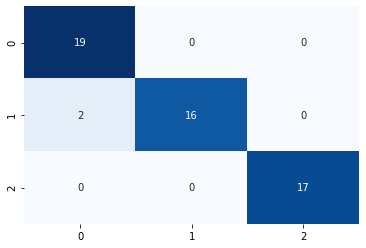

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

print (classification_report(y_test, y_pred))

cfm = confusion_matrix( y_test, y_pred )
sns.heatmap(cfm, cbar=False, annot=True, cmap="Blues", fmt="d")

## Evaluating the value of **K** (the number of neighbors to be considered)
We can use the train base and train many classifiers with different values of **K** in order to have an idea of what are the good values for **K**.

**Note**: this is an empirical evaluation highly dependent on the trainnig base, so some can have different results depending on the base and the split made.

Text(0, 0.5, 'Error Rate')

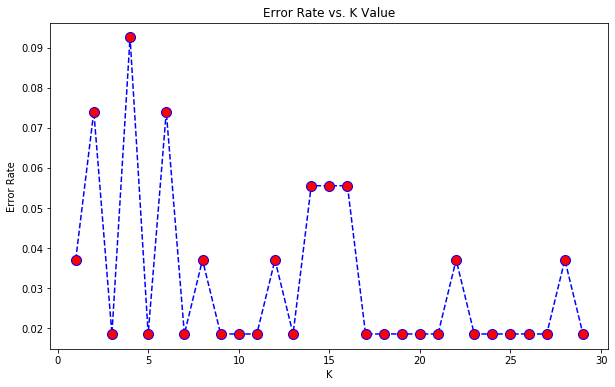

In [38]:
import matplotlib.pyplot as plt
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        19
         1.0       1.00      0.94      0.97        18
         2.0       1.00      1.00      1.00        17

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



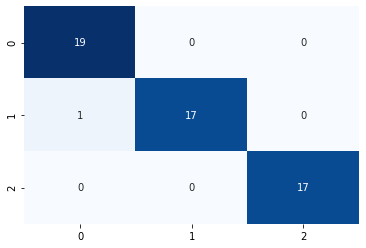

In [41]:
from sklearn.neighbors import KNeighborsClassifier  

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train_scaled, y_train) 
y_pred = classifier.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
cfm = confusion_matrix( y_test, y_pred )
sns.heatmap(cfm, cbar=False, annot=True, cmap="Blues", fmt="d")

## Using Pipeline, k-Fold Cross Validation and Grid Search

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler  


pipe = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier())
])


search_paramns = [{
    'knn__n_neighbors': [1, 3, 5, 8, 13, 21], 
}]

In [43]:
search = GridSearchCV(estimator=pipe,
                     param_grid=search_paramns,
                     cv=5,
                     return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             ii

In [44]:
search.cv_results_

{'mean_fit_time': array([0.00220146, 0.00195804, 0.00195699, 0.00193915, 0.00195489,
        0.00196328]),
 'std_fit_time': array([9.15028764e-05, 4.40579472e-05, 2.16246571e-05, 4.29229200e-05,
        2.44885478e-05, 6.13994456e-05]),
 'mean_score_time': array([0.00202279, 0.00196452, 0.00197983, 0.00195937, 0.00202856,
        0.00208144]),
 'std_score_time': array([6.13471714e-05, 6.24644665e-05, 3.74892273e-05, 9.03276091e-06,
        4.20670919e-05, 5.35516789e-05]),
 'param_knn__n_neighbors': masked_array(data=[1, 3, 5, 8, 13, 21],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'knn__n_neighbors': 1},
  {'knn__n_neighbors': 3},
  {'knn__n_neighbors': 5},
  {'knn__n_neighbors': 8},
  {'knn__n_neighbors': 13},
  {'knn__n_neighbors': 21}],
 'split0_test_score': array([0.93103448, 0.96551724, 0.96551724, 0.93103448, 0.89655172,
        0.93103448]),
 'split1_test_score': array([0.96551724, 0.96551724, 1

In [47]:
search.cv_results_.get('mean_test_score')

array([0.95788177, 0.97192118, 0.97881773, 0.95788177, 0.95812808,
       0.95788177])

In [49]:
search.cv_results_.get('mean_train_score')

array([1.        , 0.97536097, 0.97888527, 0.97360658, 0.96655799,
       0.97183667])

In [45]:
search.best_params_

{'knn__n_neighbors': 5}

In [46]:
search.best_estimator_

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      0.94      0.97        16
         2.0       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



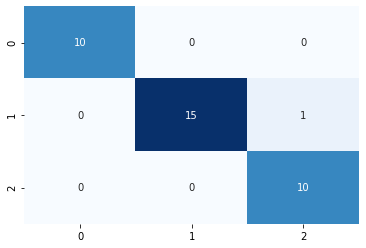

In [48]:
y_pred = search.predict(X_test)
print(classification_report(y_test, y_pred))

cfm = confusion_matrix( y_test, y_pred )
sns.heatmap(cfm, cbar=False, annot=True, cmap="Blues", fmt="d")

## Acknowledgements
- [UCI Wine Data Set](https://archive.ics.uci.edu/ml/datasets/Wine)